# 3x3 Strict vs Weak Nash Equilibria

In [1]:
import numpy as np
from IPython import display
from ThreeTimesThreeFunctions import updateStrategy, plot, calculateFrequencies, plotFrequencies, systematicPlots, randomPlots

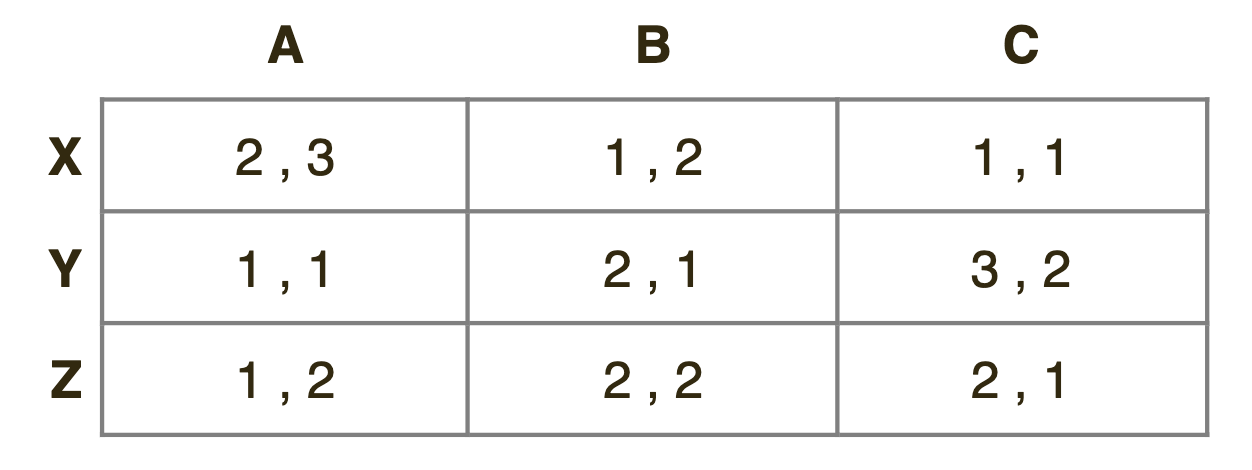

In [2]:
# from http://hoylab.cornell.edu/nash.html
display.Image("/Users/henningheyen/Desktop/Studium/TUM/BachelorThesis/Git/NoRegretLearning/Screenshots/StrictVsWeak3x3.png", width = 600)
#Strict PNE: (X,A),(Y,C)
# Weak PNE: (Y,B)
#MNE: [[[X:0, Y:1/2, Z:1/2],[A:1/2, B:1/2, C:0]], 
#       [X:0, Y:1/2, Z:1/2],[A:0, B:1, C:0]]],
#       [X:1/3, Y:2/3, Z:0],[A:2/3, B:0, C:1/3]] 


In [3]:
######### Initialization ######### (note: utility maximization)

# player 1:
payoff1 = np.array([[2,1,1],[1,2,3],[1,2,2]])

# player 2:
payoff2 = np.array([[3,2,1],[1,1,2],[2,2,1]])

#number of iterations
iterations = int(1000)

#game title
gameName = "3x3 Strict Vs Weak NE"

#name of actions. Strategy1 refers to player 1
nameOfStrategy1Action1 = "X"
nameOfStrategy1Action2 = "Y"
nameOfStrategy1Action3 = "Z"
nameOfStrategy2Action1 = "A"
nameOfStrategy2Action2 = "B"
nameOfStrategy2Action3 = "C"

strategyNames = [nameOfStrategy1Action1,nameOfStrategy1Action2, nameOfStrategy1Action3,
                nameOfStrategy2Action1, nameOfStrategy2Action2, nameOfStrategy2Action3]

######### Equilibria #########

#sytax: [..., [[P(Strategy1Action1), P(Strategy2Action2), P(Strategy2Action3)],
#              [P(Strategy2Action1), P(Strategy2Action2), P(Strategy2Action3)]], ...]

#Pure Nash Equilibria (Note that [[1,0,0],[1,0,0]],[[0,1,0],[0,0,1]] are strict whereas [[0,0,1],[0,1,0]] is weak)
pne = [[[1,0,0],[1,0,0]],[[0,1,0],[0,0,1]],[[0,0,1],[0,1,0]]]

#Mixed Nash Equilibria 
mne = [[[0,1/2,1/2],[1/2,1/2,0]], [[0,1/2,1/2],[0,1,0]]], [[1/3,2/3,0],[2/3,0,1/3]] 

In [4]:
# INITIALIAL STRATEGY # 
#strategy1init = np.array([1/9,2/9,6/9])
#strategy2init = np.array([2/7,4/7,1/7])
strategy1init = np.array([1/3 - 0.1,1/3 - 0.1,1/3 + 0.2])
strategy2init = np.array([1/3 - 0.1,1/3 - 0.1,1/3 + 0.2])

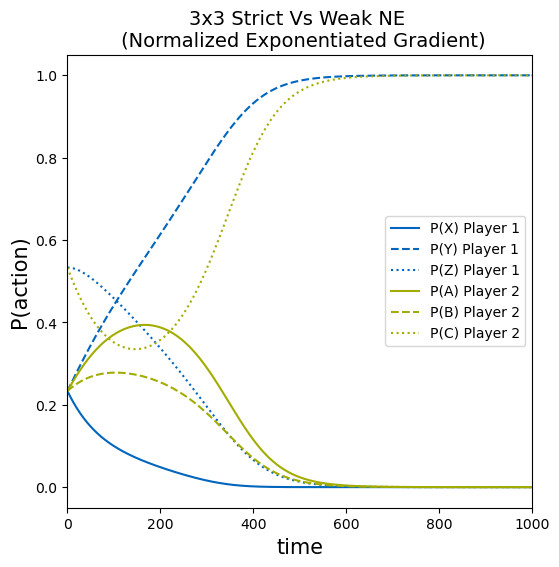

In [5]:
# NORMALIZED EXPONENTIALED GRADIENT #

strategy1, strategy2 = updateStrategy(iterations, payoff1, payoff2, strategy1init, strategy2init, "NormalizedEG")
plot(iterations, strategy1, strategy2, gameName, strategyNames, "NormalizedEG")

In [ ]:
# ONLINE GRADIENT ASCENT WITH LAZY PROJECTION #

strategy1, strategy2 = updateStrategy(iterations, payoff1, payoff2, strategy1init, strategy2init, "ProjOGA")
plot(iterations, strategy1, strategy2, gameName, strategyNames, "ProjOGA")

In [ ]:
n_per_dim = 0
systematicPlots(n_per_dim, gameName, strategyNames,
                    iterations, payoff1, payoff2, "ProjOGA", figsize = 6)

In [ ]:
randomPlots(30, gameName, strategyNames, iterations, payoff1, payoff2, "NormalizedEG", figsize=6)

In [ ]:
# EMPIRICAL FREQEUNCY DISTRIBUTION # 

p11Init = 0.1
p12Init = 0.1
p13Init = 0.8
p21Init = 0.3
p22Init = 0.1
p23Init = 0.6

iterations = int(20000)

pInit = [p11Init, p12Init, p13Init, p21Init, p22Init, p23Init]

frequencies = calculateFrequencies(pInit, iterations, payoff1, payoff2, "NormalizedEG")
plotFrequencies(iterations, frequencies, strategyNames, gameName, "NormalizedEG")